In [2]:
from radiomics import featureextractor, getTestCase
import numpy as np

In [3]:
import pydicom as dicom
import pandas as pd
import matplotlib.pyplot as plt

# specify your image path
image_path = '02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

plt.show()

<Figure size 640x480 with 1 Axes>

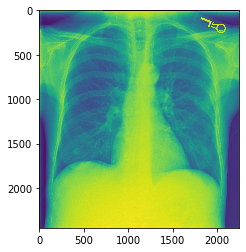

In [4]:
crop = ds.pixel_array[150:2600,150:2400]
plt.imshow(crop)

In [5]:
ds.pixel_array.shape
crop.shape

(2450, 2250)

In [6]:
np.ones((3056, 2544))

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

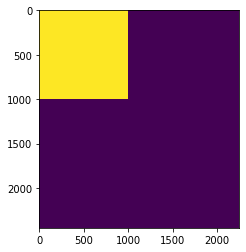

In [7]:
arr = np.zeros((2450,2250))
for i in range(1000):
    for j in range(1000):
        arr[i][j] = 1;
plt.imshow(arr)
plt.show()

In [8]:
extractor = featureextractor.RadiomicsFeatureExtractor('Params.yaml')

In [9]:
import SimpleITK as sitk
sitk_image = sitk.GetImageFromArray(crop)
sitk_mask = sitk.GetImageFromArray(arr)

In [13]:
result = extractor.execute(sitk_image, sitk_mask)

Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input


In [14]:
import six

print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0
	 diagnostics_Versions_Numpy : 1.17.3
	 diagnostics_Versions_SimpleITK : 1.2.4
	 diagnostics_Versions_PyWavelet : 1.0.0
	 diagnostics_Versions_Python : 3.6.2
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 25, 'weightingNorm': None}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : c4376d65ea1faacf3ca4d121b9fc7f089e799449
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (1.0, 1.0)
	 diagnostics_Image-original_Size : (2250, 2450)
	 diagnostics_Image-original_M